<a href="https://colab.research.google.com/github/Alexis-CAPON/cse437-reinforcement-learning/blob/main/lab2_mdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Markov Decision Problems

# Exercise 1: Grid World
Compute the value funnction for the example 4.1 in the book.







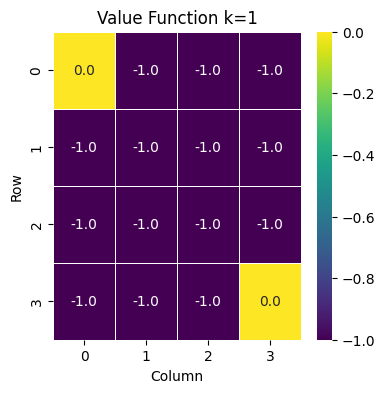

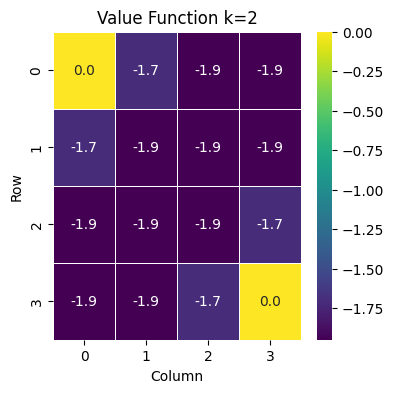

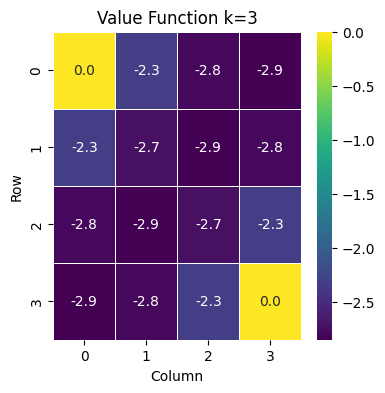

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


V = np.zeros(16)
gamma = 0.95  # Discount factor
V_old = np.zeros(16)
all_actions = [1, -1, 4, -4]
all_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
rewards = [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
grid_rows = 4
grid_cols = 4


for k in range(3):

  V_old = V.copy()

  for state in all_states:

    v_state = 0

    if state==0 or state==15:
      continue

    row = state // grid_cols
    col = state % grid_cols

    for action in all_actions:
      policy_prob = 0.25 # for simplification
      reward = -1

      sum = 0
      next_state = state

      if action == 1: # Move Right
        if col < grid_cols - 1:
          next_state = state + 1
      elif action == -1: # Move Left
        if col > 0:
          next_state = state - 1
      elif action == 4: # Move Down
        if row < grid_rows - 1:
          next_state = state + grid_cols
      elif action == -4: # Move Up
        if row > 0:
          next_state = state - grid_cols

      sum += (reward + gamma * V_old[next_state])

      v_state += sum * policy_prob

    V[state] = v_state





  ###### PLOT
  # Reshape the 1D value function array into an 8x8 grid
  V_grid = V.reshape((4, 4))

  # Plot the value function as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
  plt.title("Value Function k=%d"%(k+1))
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.show()

# Exercise 2: Grid World
Compute the optimal policy




In [2]:
from collections.abc import ByteString
from os import stat_result
print(V)

def get_possible_actions(state):
  all_possible_actions = []
  all_values = []

  row = state // grid_cols
  col = state % grid_cols

  for action in all_actions:
    if action == 1: # Move Right
        if col < grid_cols - 1:
          all_possible_actions.append(1)
          all_values.append(V[state+1])
    elif action == -1: # Move Left
        if col > 0:
          all_possible_actions.append(-1)
          all_values.append(V[state-1])
    elif action == 4: # Move Down
        if row < grid_rows - 1:
          all_possible_actions.append(grid_cols)
          all_values.append(V[state+grid_cols])
    elif action == -4: # Move Up
        if row > 0:
          all_possible_actions.append(-grid_cols)
          all_values.append(V[state-grid_cols])
  return all_possible_actions, all_values


optimal_policy = []
all_actions = [1, -1, 4, -4]

for state in all_states:
  if state==0 or state==15:
    continue
  print("---- State: "+ str(state) + " ----")
  ## We will check each near actions and select the best output and multiples if there are tie

  all_possible_actions, value_functions_actions = get_possible_actions(state)
  print("Possible actions:"+ str(all_possible_actions))
  print("Value functions actions:" +str(value_functions_actions))
  max_value = np.max(value_functions_actions)
  all_max_values = [k for k in range(0,len(value_functions_actions)) if value_functions_actions[k] == max_value]
  best_actions = [all_possible_actions[i] for i in all_max_values]
  print("Best actions to realize: "+str(best_actions))

  optimal_policy.append(best_actions)

  print("------------------")



print("Final optimal policy" + str(optimal_policy))



[ 0.         -2.33296875 -2.79609375 -2.8525     -2.33296875 -2.7396875
 -2.8525     -2.79609375 -2.79609375 -2.8525     -2.7396875  -2.33296875
 -2.8525     -2.79609375 -2.33296875  0.        ]
---- State: 1 ----
Possible actions:[1, -1, 4]
Value functions actions:[np.float64(-2.79609375), np.float64(0.0), np.float64(-2.7396875)]
Best actions to realize: [-1]
------------------
---- State: 2 ----
Possible actions:[1, -1, 4]
Value functions actions:[np.float64(-2.8525), np.float64(-2.33296875), np.float64(-2.8525)]
Best actions to realize: [-1]
------------------
---- State: 3 ----
Possible actions:[-1, 4]
Value functions actions:[np.float64(-2.79609375), np.float64(-2.79609375)]
Best actions to realize: [-1, 4]
------------------
---- State: 4 ----
Possible actions:[1, 4, -4]
Value functions actions:[np.float64(-2.7396875), np.float64(-2.7960937500000003), np.float64(0.0)]
Best actions to realize: [-4]
------------------
---- State: 5 ----
Possible actions:[1, -1, 4, -4]
Value functio

# Exercise 3: Grid World
In the following gym environment, compute the value function using Monte Carlo.

Run the following code in your local machine. You can run in on colab, but you will not see the animation.

In [27]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

import gymnasium as gym
import gym_simplegrid
import builtins
import pickle, os, time, imageio
from IPython.display import display, HTML
from base64 import b64encode

In [18]:
def print_value_grid(V, grid_size=8):
    V_reshaped = V.reshape(grid_size, grid_size)
    for row in V_reshaped:
        print(" ".join(f"{v:6.2f}" for v in row))

def show_gif(frames, fps=4):
    """
    Display a list of RGB frames (H, W, 3) as an inline GIF in Colab.
    """
    gif_path = "/content/episode.gif"
    imageio.mimsave(gif_path, frames, fps=fps)
    with open(gif_path, "rb") as f:
        data_url = "data:image/gif;base64," + b64encode(f.read()).decode()
    display(HTML(f'<img src="{data_url}" />'))


In [23]:
class FirstVisitMC:
    def __init__(self, env, gamma=0.9, n_states=64):
        """
        Initialize First-Visit Monte Carlo algorithm.
        """
        self.env = env
        self.gamma = gamma
        self.V = np.zeros(n_states, dtype=np.float64)
        self.returns = {i: [] for i in range(n_states)}

    def _compute_return(self, rewards):
        """
        Compute the discounted return G_t for an episode.
        """
        G = 0.0
        returns = []
        for r in reversed(rewards):
            G = r + self.gamma * G
            returns.append(G)
        return list(reversed(returns))

    def generate_episode(self, policy, options, max_steps=100):
        """
        Generate an episode following the given policy.
        Returns states, actions, rewards.
        """
        states, actions, rewards = [], [], []
        obs, _ = self.env.reset(options=options)
        done = False
        steps = 0

        while not done and steps < max_steps:
            action = policy(obs)
            next_obs, reward, terminated, truncated, _ = self.env.step(action)
            done = terminated or truncated

            states.append(obs)
            actions.append(action)
            rewards.append(reward)

            obs = next_obs
            steps += 1

        return states, actions, rewards

    def evaluate_policy(self, policy, options, num_episodes=1000, max_steps_per_episode=100, goal_loc=None, log_every=100):
        """
        Evaluate a policy using First-Visit Monte Carlo.
        Returns: (value_function, training_stats)
        """
        best_episode_length = float('inf')
        best_episode_reward = float('-inf')
        goal_reaches = 0

        for episode in range(num_episodes):
            # Generate an episode
            states, actions, rewards = self.generate_episode(policy, options, max_steps=max_steps_per_episode)
            returns = self._compute_return(rewards)
            episode_reward = builtins.sum(rewards)

            # Update statistics
            if goal_loc is not None and goal_loc in states:
                goal_reaches += 1
                if len(states) < best_episode_length:
                    best_episode_length = len(states)
            if episode_reward > best_episode_reward:
                best_episode_reward = episode_reward

            # First-visit update
            visited_states = set()
            for t, state in enumerate(states):
                if state not in visited_states:
                    visited_states.add(state)
                    self.returns[state].append(returns[t])
                    self.V[state] = np.mean(self.returns[state])

            # Progress logs
            if (episode % log_every) == 0:
                success_rate = (goal_reaches / (episode + 1)) * 100
                print(f"\nEpisode {episode}/{num_episodes}")
                print(f"Episode length: {len(states)}")
                print(f"Episode reward: {episode_reward:.2f}")
                print(f"Best ep length: {best_episode_length}")
                print(f"Best ep reward: {best_episode_reward:.2f}")
                print(f"Current success rate: {success_rate:.2f}%")
                if goal_loc is not None and goal_loc in states:
                    print("Goal reached! 🎉")
                print("\nCurrent Value Function:")
                print_value_grid(self.V)
                print("-" * 40)

        training_stats = {
            'best_episode_length': best_episode_length if best_episode_length < float('inf') else None,
            'best_episode_reward': best_episode_reward,
            'success_rate': (goal_reaches / num_episodes) * 100 if num_episodes > 0 else 0.0,
            'total_episodes': num_episodes
        }
        return self.V, training_stats


In [20]:
# Grid settings
GRID_SIZE = 8
N_STATES = GRID_SIZE * GRID_SIZE

# Start/Goal (you can change these)
START_LOC = 15
GOAL_LOC = 3

options = {
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

def smart_random_policy_factory(env, goal_loc=GOAL_LOC, greedy_prob=0.2):
    """
    Returns a policy(state)->action that moves randomly most of the time, and
    20% of the time nudges toward the goal.
    """
    def policy(state):
        if np.random.random() > greedy_prob:
            return env.action_space.sample()
        current_row = state // GRID_SIZE
        current_col = state % GRID_SIZE
        goal_row = goal_loc // GRID_SIZE
        goal_col = goal_loc % GRID_SIZE

        # Prefer moving along the larger distance dimension
        if abs(goal_row - current_row) > abs(goal_col - current_col):
            return 1 if goal_row > current_row else 0  # DOWN : UP
        else:
            return 3 if goal_col > current_col else 2  # RIGHT : LEFT
    return policy

def run_evaluation_episode(env, policy, options, capture_frames=True, max_steps=100, sleep_s=0.0):
    """
    Runs a single evaluation episode.
    If capture_frames=True and env supports rgb_array, returns frames for GIF.
    """
    frames = []
    obs, _ = env.reset(options=options)
    done = False
    total_reward = 0.0
    steps = 0
    states = [obs]

    # If rgb_array rendering is available, capture the first frame
    if capture_frames:
        frame = env.render()
        if frame is not None:
            frames.append(frame)

    while not done and steps < max_steps:
        if sleep_s > 0:
            time.sleep(sleep_s)
        action = policy(obs)
        obs, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        total_reward += reward
        states.append(obs)
        steps += 1

        if capture_frames:
            frame = env.render()
            if frame is not None:
                frames.append(frame)

    reached_goal = GOAL_LOC in states
    return total_reward, steps, reached_goal, frames


Training First-Visit Monte Carlo with a smart random policy...
Start location: 15 (row=1, col=7)
Goal  location: 3 (row=0, col=3)
----------------------------------------

Episode 0/2000
Episode length: 41
Episode reward: -5.00
Best ep length: inf
Best ep reward: -5.00
Current success rate: 0.00%

Current Value Function:
  0.00   0.00   0.00   0.00  -0.97  -1.78  -1.60   0.00
  0.00   0.00   0.00  -1.19  -1.07  -1.50  -1.44  -1.30
  0.00   0.00   0.00   0.00  -0.65  -1.35   0.00   0.00
  0.00   0.00   0.00  -0.09  -0.89   0.00   0.00   0.00
  0.00   0.00   0.00   0.00  -0.99   0.00   0.00   0.00
  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
----------------------------------------

Episode 200/2000
Episode length: 26
Episode reward: -2.00
Best ep length: inf
Best ep reward: 1.00
Current success rate: 0.00%

Current Value Function:
 -1.69  -1.13  -0.53   0.00   0.17 

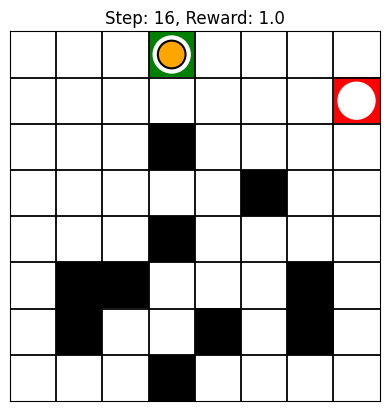

In [25]:
# Create env with rgb_array so we can render in Colab
env = gym.make('SimpleGrid-8x8-v0', render_mode='rgb_array')
print("Training First-Visit Monte Carlo with a smart random policy...")
print(f"Start location: {START_LOC} (row={START_LOC//GRID_SIZE}, col={START_LOC%GRID_SIZE})")
print(f"Goal  location: {GOAL_LOC} (row={GOAL_LOC//GRID_SIZE}, col={GOAL_LOC%GRID_SIZE})")
print("-" * 40)

policy = smart_random_policy_factory(env, goal_loc=GOAL_LOC, greedy_prob=0.2)
mc = FirstVisitMC(env, gamma=0.9, n_states=N_STATES)

# Adjust num_episodes as you like
V, training_stats = mc.evaluate_policy(
    policy, options=options,
    num_episodes=2000,          # e.g., 2000 for a quick run in Colab
    max_steps_per_episode=100,
    goal_loc=GOAL_LOC,
    log_every=200
)

print("\nEstimated Value Function:")
print_value_grid(V)


Running one evaluation episode with visualization...
Reward: 1.00 | Steps: 7 | Reached goal: True



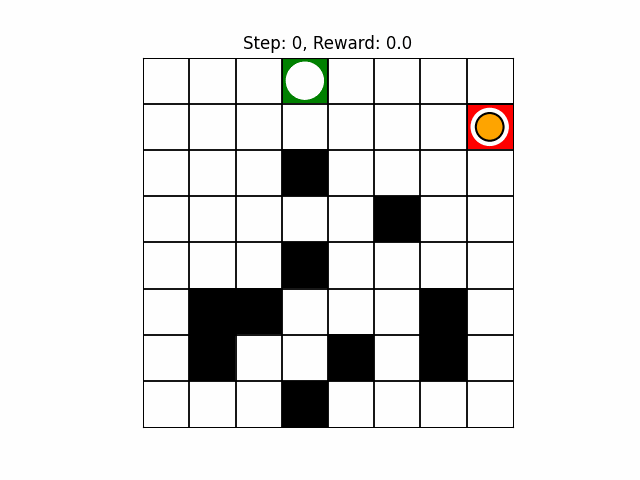

In [28]:
# Run one episode and show it as a GIF inline
print("Running one evaluation episode with visualization...")
reward, steps, reached, frames = run_evaluation_episode(env, policy, options, capture_frames=True, max_steps=100)
print(f"Reward: {reward:.2f} | Steps: {steps} | Reached goal: {reached}")
if frames:
    show_gif(frames, fps=4)
else:
    print("No frames captured (render might not be supported).")


In [30]:
# Test mode equivalent
eval_episodes = 10
successes = 0
total_steps = 0
total_rewards = 0.0

print(f"Testing over {eval_episodes} episodes...")
for i in range(eval_episodes):
    reward, steps, reached, _ = run_evaluation_episode(env, policy, options, capture_frames=False)
    total_rewards += reward
    total_steps += steps
    successes += int(reached)
    print(f"Episode {i+1:02d} -> Steps: {steps:3d} | Reward: {reward:6.2f} | {'Success 🎉' if reached else 'Failed'}")

print("\nFinal Test Results:")
print(f"Success Rate: {successes/eval_episodes*100:.1f}%")
print(f"Average Steps: {total_steps/eval_episodes:.1f}")
print(f"Average Reward: {total_rewards/eval_episodes:.2f}")


Testing over 10 episodes...
Episode 01 -> Steps:  10 | Reward:   0.00 | Success 🎉
Episode 02 -> Steps:  76 | Reward: -18.00 | Success 🎉
Episode 03 -> Steps:  28 | Reward:   0.00 | Success 🎉
Episode 04 -> Steps:  13 | Reward:  -3.00 | Success 🎉
Episode 05 -> Steps:  14 | Reward:   0.00 | Success 🎉
Episode 06 -> Steps:  18 | Reward:  -2.00 | Success 🎉
Episode 07 -> Steps:  13 | Reward:   1.00 | Success 🎉
Episode 08 -> Steps:   9 | Reward:   1.00 | Success 🎉
Episode 09 -> Steps:  38 | Reward:   0.00 | Success 🎉
Episode 10 -> Steps:  37 | Reward:  -3.00 | Success 🎉

Final Test Results:
Success Rate: 100.0%
Average Steps: 25.6
Average Reward: -2.40
